## Masters Degree Programs In India - Admissions Dataset Decision Tree
##### Dataset Utilized: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions/
The following is a look at multiple features included within an admissions dataset for masters degree programs in India. Through the following code, a decision tree will be created via the Scikit library. 
This was in part with my guided course work via Codecademy.

In [91]:
#Importing Libraries
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import model_selection as ms
from sklearn import tree as tree
from sklearn.metrics import accuracy_score


In [10]:
admissions_predict = pd.read_csv("Admission_Predict.csv")
admissions_predict.head()

In [82]:
admissions_predict.columns = admissions_predict.columns.str.strip().str.replace(' ','_').str.lower()
admissions_predict.head()

,serial_no.,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [85]:
#Creating a binary class for chance to admit (1=admission likely, 0=admission unlikely)
X = admissions_predict.loc[:, 'gre_score':'research']
y = admissions_predict['chance_of_admit']>=.8

In [86]:
x_train, x_test, y_train, y_test = ms.train_test_split(X,y, random_state=0, test_size = 0.2)
prediction_dt = tree.DecisionTreeClassifier(max_depth=2,ccp_alpha=0.01,criterion='gini')
prediction_dt.fit(x_train, y_train)

y_predicted = prediction_dt.predict(x_test)

print(accuracy_score(y_test, y_predicted))

0.925


|--- cgpa <= 8.85
|   |--- class: False
|--- cgpa >  8.85
|   |--- gre_score <= 313.50
|   |   |--- class: False
|   |--- gre_score >  313.50
|   |   |--- class: True



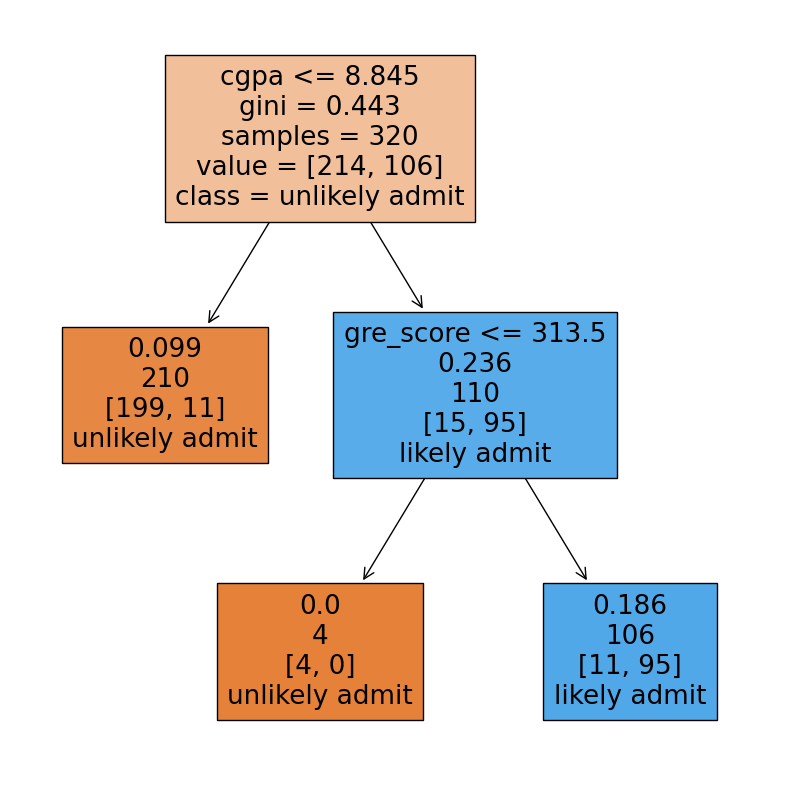

In [116]:
# Two ways to print decision tree - plot_tree and export_text. Export text will list the rules out in text form.
plt.figure(figsize=(10,10))
tree.plot_tree(prediction_dt, feature_names = x_train.columns, max_depth = 5, class_names = ['unlikely admit', 'likely admit'],\
                  label = 'root', filled = True)

print(tree.export_text(prediction_dt, feature_names = x_train.columns.tolist()))

In [102]:
# Regression fitting - Finding average chance of admitance based on Mean Squared Error minimization.
X = admissions_predict.loc[:,'gre_score':'research']
y = admissions_predict['chance_of_admit']

In [111]:
x_train, x_test, y_train, y_test = ms.train_test_split(X,y, random_state=0, test_size=0.2)

dt = tree.DecisionTreeRegressor(max_depth=3, ccp_alpha=0.001)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print(dt.score(x_test, y_test))

0.5230242793515552


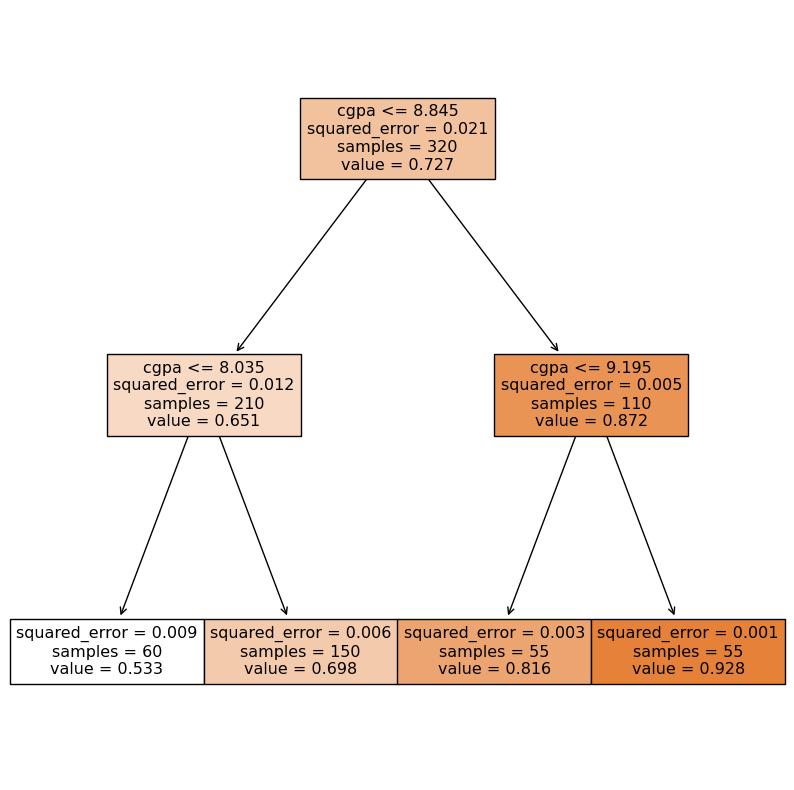

In [118]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt, feature_names=x_train.columns, filled=True, max_depth=2);